In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
data_test = pd.read_csv('test.csv')

In [4]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [34]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226.0,1412,3476,12,7.000,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746.0,857,3895,6,5.316,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270.0,1366,2396,17,10.000,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295.0,1752,3893,10,5.316,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749.0,810,1773,15,8.000,7,1,0,1


In [5]:
missing_values_train = data_train.isnull().sum()

In [6]:
missing_values_train

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
missing_values_test = data_test.isnull().sum()
missing_values_test

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

No null or missing values found

In [8]:
data_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
#checking for zero vales
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [11]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [12]:
#screen width and pixel height of any mobile can't be zero, so replace it with mean value of that column
data_train.loc[data_train['sc_w'] == 0, 'sc_w'] = data_train.sc_w.mean()
data_train.loc[data_train['px_height'] == 0, 'px_height'] = data_train.px_height.mean()


In [13]:
#checking if the values have been replaced
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


The zero values in px_height and sc_w have been replaced with their mean values and the same will bw done for test dataset

In [14]:
data_test.loc[data_test['sc_w'] == 0, 'sc_w'] = data_test.sc_w.mean()
data_test.loc[data_test['px_height'] == 0, 'px_height'] = data_test.px_height.mean()

In [15]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.500000,288.819436,1.0,250.75,500.500,750.25,1000.0
battery_power,1000.0,1248.510000,432.458227,500.0,895.00,1246.500,1629.25,1999.0
blue,1000.0,0.516000,0.499994,0.0,0.00,1.000,1.00,1.0
clock_speed,1000.0,1.540900,0.829268,0.5,0.70,1.500,2.30,3.0
dual_sim,1000.0,0.517000,0.499961,0.0,0.00,1.000,1.00,1.0
fc,1000.0,4.593000,4.463325,0.0,1.00,3.000,7.00,19.0
four_g,1000.0,0.487000,0.500081,0.0,0.00,0.000,1.00,1.0
int_memory,1000.0,33.652000,18.128694,2.0,18.00,34.500,49.00,64.0
m_dep,1000.0,0.517500,0.280861,0.1,0.30,0.500,0.80,1.0
mobile_wt,1000.0,139.511000,34.851550,80.0,109.75,139.000,170.00,200.0


In [17]:
data_train.shape

(2000, 21)

In [18]:
data_test.shape

(1000, 21)

Checking correlation between price range and other attributes

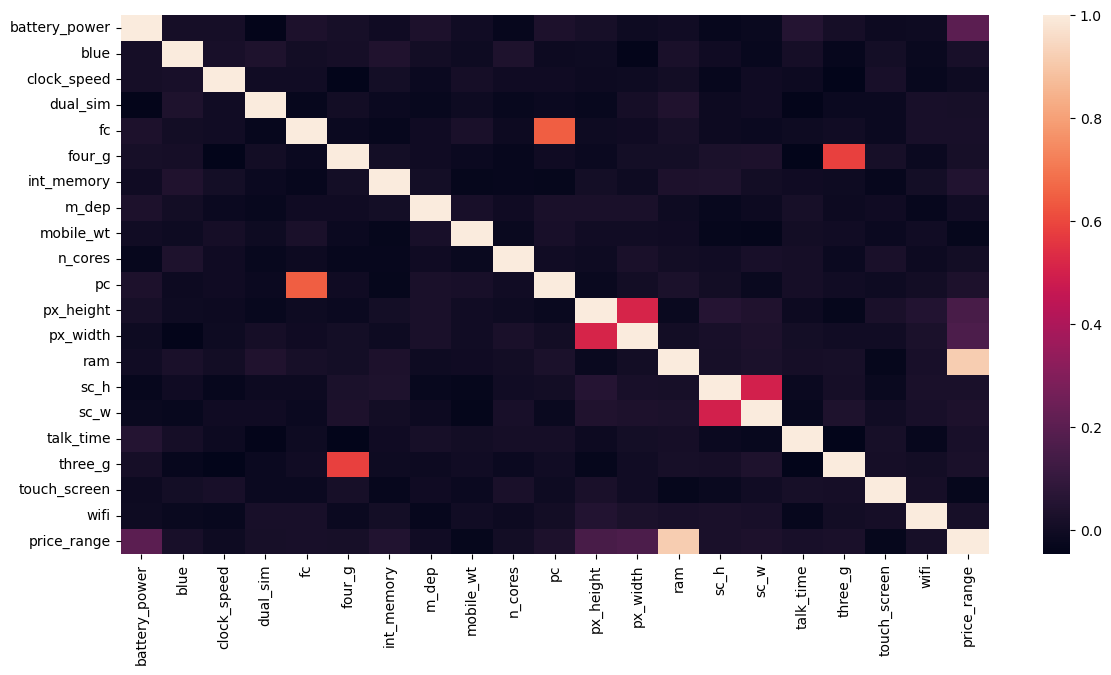

In [20]:
plt.figure(figsize = (14,7))
sns.heatmap(data_train.corr())
plt.show()

This shows that the lighter regions have good relation with each other
Well now check relation with each of these lighter regions

Checking relation between price range and battery power

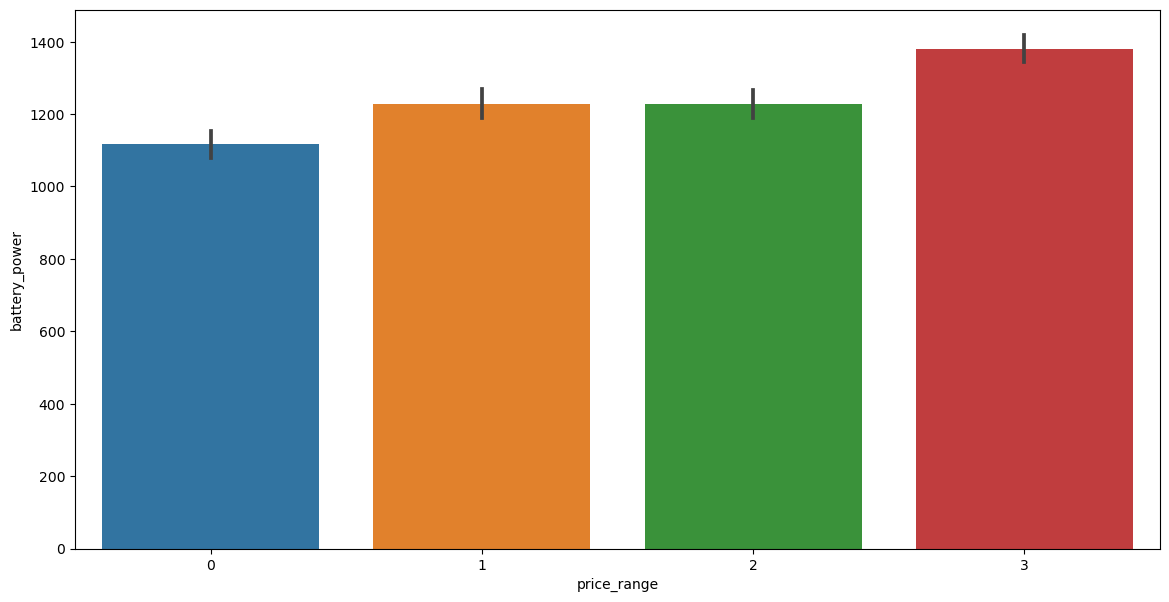

In [21]:
plt.figure(figsize = (14,7))
sns.barplot(x = 'price_range', y = 'battery_power', data = data_train)
plt.show()

## Relation between price range and pixel height and width

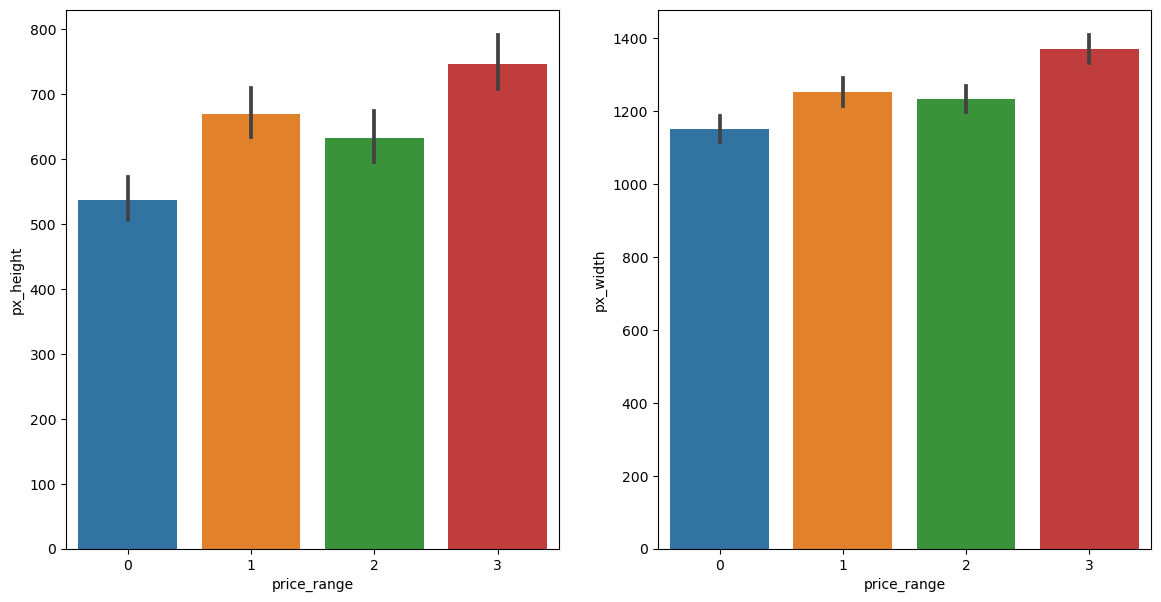

In [22]:
plt.figure(figsize = (14,7))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data = data_train)
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data = data_train)
plt.show()

## Relation between price range and RAM

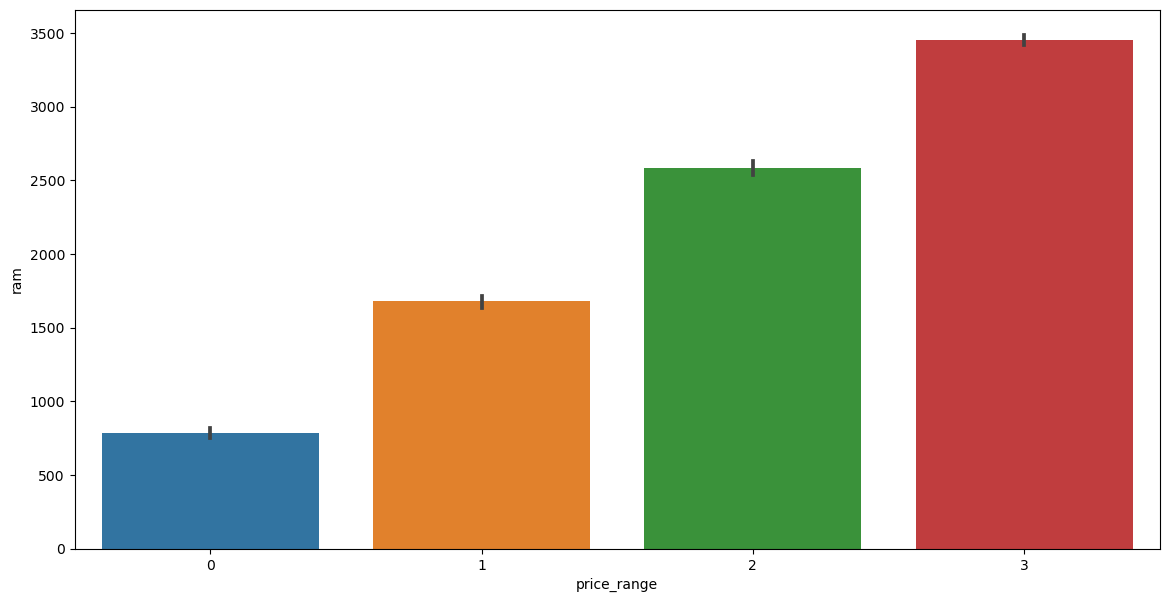

In [23]:
plt.figure(figsize = (14,7))
sns.barplot(x = 'price_range', y = 'ram', data = data_train)
plt.show()

## price range and 3g and 4g

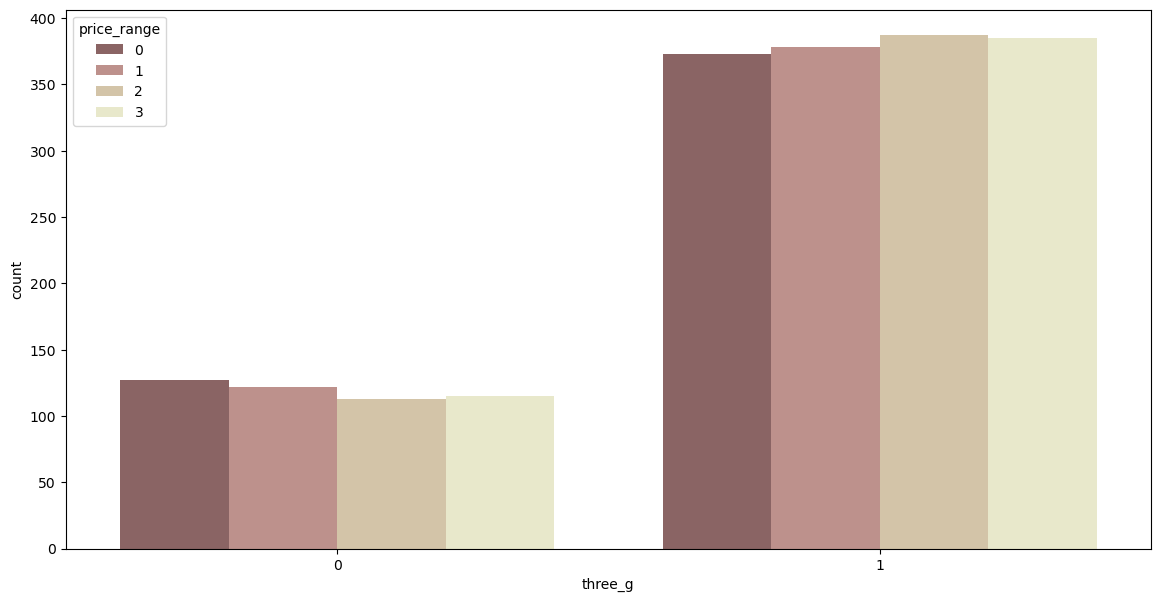

In [29]:
plt.figure(figsize = (14,7))
sns.countplot(x = data_train['three_g'] , hue = data_train['price_range'], palette = 'pink')
plt.show()

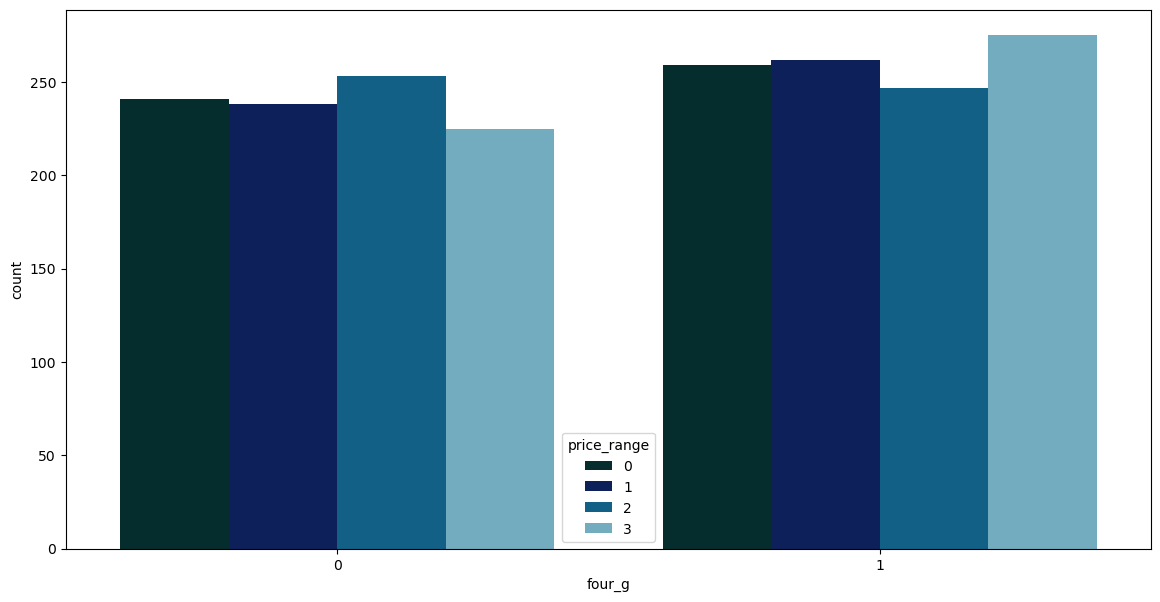

In [30]:
plt.figure(figsize = (14,7))
sns.countplot(x = data_train['four_g'] , hue = data_train['price_range'], palette = 'ocean')
plt.show()

## relationship between dual sim or not, memory and price range

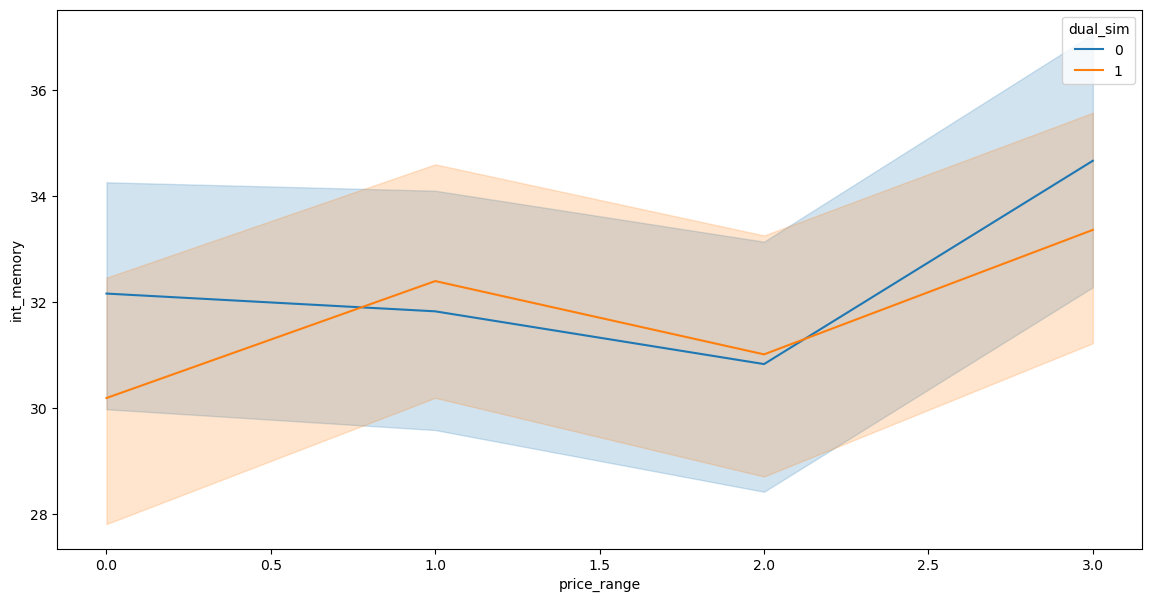

In [31]:
plt.figure(figsize = (14,7))
sns.lineplot(x = 'price_range', y = 'int_memory', data = data_train, hue = 'dual_sim')
plt.show()

## splitting our data

In [32]:
x = data_train.drop(['price_range'], axis = 1)
y = data_train['price_range']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

### removing id column ad introducing price range column

In [35]:
data_test = data_test.drop(['id'], axis = 1)
data_test.shape

(1000, 20)

### implementing gradient boosting classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state = 0)
GB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [38]:
GB.score(x_train,y_train)

0.99875

In [39]:
GB_prediction = GB.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, GB_prediction)

0.905

In [41]:
gbtest_prediction = GB.predict(data_test)

In [44]:
data_test['gbprice_prediction'] = gbtest_prediction 

In [47]:
data_test.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,gbprice_prediction
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226.0,1412,3476,12,7.000,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746.0,857,3895,6,5.316,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270.0,1366,2396,17,10.000,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295.0,1752,3893,10,5.316,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749.0,810,1773,15,8.000,7,1,0,1,1


### removing gbprediction and implementing random forest classifier

In [55]:
data_test = data_test.drop(['gbprice_prediction'], axis = 1)
data_test.shape

(1000, 20)

In [56]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [57]:
RF.score(x_train,y_train)

1.0

In [58]:
RF_prediction = RF.predict(x_test)

In [59]:
accuracy_score(y_test, RF_prediction)

0.895

In [60]:
rftest_prediction = RF.predict(data_test)

In [61]:
data_test['rfprice_prediction'] = rftest_prediction 

In [62]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,rfprice_prediction
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226.0,1412,3476,12,7.000,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746.0,857,3895,6,5.316,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270.0,1366,2396,17,10.000,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295.0,1752,3893,10,5.316,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749.0,810,1773,15,8.000,7,1,0,1,1


### removing rfprediction and implementing xg boosting classifier

In [63]:
data_test = data_test.drop(['rfprice_prediction'], axis = 1)
data_test.shape

(1000, 20)